In [12]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp
import seaborn as sns
import scipy.stats as stats
import random
import numpy as np
import os
import json
import seaborn as sns
import matplotlib.pyplot as plt

In [35]:
def compute_chi(data):
    '''
    Computes the value of Chi, a synchrony measurement that compares the variance of individual voltage traces and the variance of the mean of the voltages.

    Parameters:
        data (list[float]):
            Voltage traces with each row corresponding one neuron.

    Returns:
        chi (float):
            The value of Chi.
    '''

    #calculate the average voltage as a function of time
    mean_voltage = np.mean(data,axis=0)

    #calculate the variance of each trave and the average voltage
    ind_variance = np.mean(np.square(data),axis=1) - np.mean(data,axis=1)**2
    total_variance = np.mean(np.square(mean_voltage)) - np.mean(mean_voltage)**2

    #calculate chi
    chi = np.sqrt(total_variance**2 / np.mean(ind_variance**2))

    return chi 


In [36]:
from scipy import signal
def compute_Reliability(spike_matrix,t,t_R):
    '''
    Computes the value of Reliability, a synchrony measurement that computes the variance of a convoluted spike train that is the sum of the spike trains of each neuron.

    Parameters:
        spike_matrix (tuple[tuple[int,int]] | sparse_matrix):
            matrix containing spike trains, each row contains a diffent neuron.
        t (list[float]):
            time array, time points of the simulation
        t_R (float):
            Time constant

    Returns:
        reliability / reliability_max (float):
            The computed value of reliability, normalised so (theorically) is between 0 and 1.
        Convolved_matrix (tuple[float]):
            The convolved spike train.
    '''

    #compute the time step of the simulation
    T = t[-1] - t[0]
    dt = T / len(t)

    #we need to work with a np.ndarray for the convolution, if it is a sparse_matrix, change it to that type
    if type(spike_matrix) is not np.ndarray:
        spike_matrix = np.array(spike_matrix.todense())

    #Compute the mean number of spikes
    num_spikes = (spike_matrix>0).sum()/num_neurons

    #Compute the kernel, and convolve the sum spike train with it
    joined_matrix = np.sum(spike_matrix,axis=0)
    kernel = 1/ t_R *np.exp(-t / t_R)
    Convolved_matrix = signal.convolve(joined_matrix,kernel)[0:len(spike_matrix[0,:])]
    #Convolved_matrix = joined_matrix

    #compute the measurements of reliability
    reliability = 1 / t[len(t) - 1] * np.trapz(np.square(Convolved_matrix), dx = dt) - np.square( 1 / t[len(t) - 1] * np.trapz(Convolved_matrix,dx =dt))
    reliability_max = ( num_neurons**2 * num_spikes / ( t_R * 2 * T ) - ( num_neurons * num_spikes / T )**2 )
    #reliability_max = 1
    return reliability/reliability_max, Convolved_matrix

In [15]:
g_syn_values = np.linspace(0.005, 0.1, 20)  
print(g_syn_values)
tau_s_values = np.linspace(0.25, 5, 20)
print(tau_s_values)

[0.005 0.01  0.015 0.02  0.025 0.03  0.035 0.04  0.045 0.05  0.055 0.06
 0.065 0.07  0.075 0.08  0.085 0.09  0.095 0.1  ]
[0.25 0.5  0.75 1.   1.25 1.5  1.75 2.   2.25 2.5  2.75 3.   3.25 3.5
 3.75 4.   4.25 4.5  4.75 5.  ]


In [13]:
chi_sq_matrix = np.array([
    [0.02026737, 0.03891146, 0.04272155, 0.07046395, 0.04861516, 0.07201777,
     0.05052684, 0.04843679, 0.09013147, 0.07833297, 0.11015887, 0.05340375,
     0.10112522, 0.06609013, 0.11097462, 0.05902915, 0.08929057, 0.06971153,
     0.07483226, 0.10054704],
    [0.03355232, 0.08413837, 0.08513334, 0.13450005, 0.11786255, 0.11123496,
     0.13660161, 0.13740987, 0.13820266, 0.1725052,  0.16323125, 0.1460479,
     0.15235073, 0.14740787, 0.15277782, 0.15994939, 0.11379567, 0.15673577,
     0.13232347, 0.08250206],
    [0.04546474, 0.11970841, 0.16638644, 0.17512409, 0.20305306, 0.1650868,
     0.25477576, 0.23029749, 0.25297699, 0.2288729,  0.25675981, 0.19425546,
     0.2582652,  0.26564567, 0.27763968, 0.24071628, 0.20632288, 0.25600261,
     0.24895633, 0.28499344],
    [0.07932748, 0.14934631, 0.18099527, 0.22489934, 0.24214611, 0.25556333,
     0.28024404, 0.29528659, 0.29752085, 0.32389588, 0.31862102, 0.33444324,
     0.35856409, 0.32246466, 0.3685089,  0.35265089, 0.3761514,  0.37304638,
     0.34515092, 0.33307028],
    [0.08891576, 0.16390841, 0.21856099, 0.23392839, 0.25905431, 0.29485675,
     0.3063195,  0.32407904, 0.34383965, 0.36101056, 0.35483982, 0.3743519,
     0.36476159, 0.37564884, 0.39162626, 0.39699231, 0.39242363, 0.39750639,
     0.40276968, 0.40994659],
    [0.10260459, 0.18201508, 0.22466027, 0.27083555, 0.28524152, 0.31715979,
     0.32175146, 0.32973253, 0.34301255, 0.36581402, 0.36742821, 0.37868208,
     0.40002588, 0.38915711, 0.40717046, 0.40148797, 0.41469231, 0.41449246,
     0.42051631, 0.42024447],
    [0.11661349, 0.1677589,  0.23902034, 0.2682479,  0.30376523, 0.31693734,
     0.33848999, 0.35545323, 0.35150409, 0.37576036, 0.38187661, 0.39899452,
     0.39802448, 0.40757361, 0.41885743, 0.4084065,  0.41335243, 0.41174193,
     0.43622337, 0.43841809],
    [0.10430042, 0.19382434, 0.24534606, 0.28071496, 0.30647394, 0.32683049,
     0.34804446, 0.36772944, 0.3801351,  0.38413599, 0.39294726, 0.39841061,
     0.40567636, 0.41097073, 0.41355706, 0.42021195, 0.42800648, 0.43948328,
     0.44605134, 0.44827293],
    [0.1259475,  0.20103557, 0.25245742, 0.2815198,  0.32273257, 0.32731535,
     0.34576844, 0.3687276,  0.36918382, 0.38334566, 0.3988475,  0.39474296,
     0.41081507, 0.42088414, 0.42540253, 0.43311603, 0.43300087, 0.41992108,
     0.42480502, 0.43623115],
    [0.12973929, 0.2064681,  0.26226238, 0.29302166, 0.31245882, 0.35390274,
     0.35837701, 0.36561477, 0.37460864, 0.3922383,  0.39578122, 0.40684235,
     0.4041933,  0.41710344, 0.4158703,  0.40918337, 0.43672104, 0.43988491,
     0.43075597, 0.43738994],
    [0.14703459, 0.21813341, 0.26118845, 0.28624712, 0.3275134,  0.34150427,
     0.34396815, 0.36159793, 0.3736157,  0.37860115, 0.38791607, 0.38936,
     0.39124401, 0.42331877, 0.43192449, 0.42085954, 0.42508098, 0.43614677,
     0.43910349, 0.44016862],
    [0.1437526,  0.22306454, 0.2789485,  0.30346695, 0.32779678, 0.34820611,
     0.35890509, 0.36848566, 0.37478876, 0.39434348, 0.41121509, 0.3954863,
     0.41529621, 0.40505864, 0.42582869, 0.42097437, 0.42163801, 0.42897004,
     0.43454521, 0.44052256],
    [0.13492671, 0.22041406, 0.27046715, 0.31629764, 0.3202458,  0.34502833,
     0.3501243,  0.36549286, 0.3682317,  0.37679145, 0.38648903, 0.39084699,
     0.40629352, 0.40406748, 0.40621699, 0.41325129, 0.4267415,  0.43260451,
     0.44362347, 0.44139381],
    [0.15139762, 0.21492235, 0.25879703, 0.30421069, 0.3242982,  0.33141263,
     0.36267325, 0.3762762,  0.37252351, 0.37885948, 0.39568755, 0.39602356,
     0.41967259, 0.41324217, 0.4047073,  0.40159663, 0.43050894, 0.43359163,
     0.42154021, 0.43674846],
    [0.12981482, 0.23087316, 0.27069078, 0.29170848, 0.31847466, 0.32848585,
     0.36028409, 0.35873586, 0.37395609, 0.38400041, 0.37819745, 0.38270376,
     0.38461846, 0.40833455, 0.4107371,  0.42536442, 0.38318816, 0.39879764,
     0.41330926, 0.39781952],
    [0.1326333,  0.23328449, 0.26584267, 0.29185147, 0.31476966, 0.33106435,
     0.32844763, 0.33093723, 0.37646585, 0.38047096, 0.3563336,  0.39327209,
     0.37378207, 0.36645618, 0.3939736,  0.39658061, 0.43000475, 0.41549606,
     0.42303985, 0.40071498],
    [0.11970158, 0.22584177, 0.27636507, 0.29075244, 0.31708344, 0.30751823,
     0.34981993, 0.34159348, 0.35729803, 0.35167579, 0.38516957, 0.37692291,
     0.38501028, 0.3744659,  0.394055,   0.40926357, 0.39650074, 0.39947887,
     0.42159476, 0.38867298],
    [0.11619404, 0.21472669, 0.2520425,  0.29924897, 0.30193985, 0.30465475,
     0.33706802, 0.35317619, 0.34477481, 0.36571027, 0.38161764, 0.3566645,
     0.37832388, 0.38119315, 0.38356846, 0.37338922, 0.39602669, 0.36846014,
     0.37939456, 0.38854151],
    [0.1607129,  0.20743988, 0.26089732, 0.28062427, 0.3009426,  0.30593161,
     0.32705363, 0.33534632, 0.35677582, 0.35762117, 0.34292533, 0.33024783,
     0.35956726, 0.35192866, 0.39091645, 0.38075304, 0.39120646, 0.37230824,
     0.38826359, 0.37474579],
    [0.13134572, 0.21161414, 0.25859108, 0.26730051, 0.29042029, 0.29164282,
     0.3163985,  0.3491364,  0.35305611, 0.34998177, 0.35137747, 0.34962273,
     0.37104465, 0.35413469, 0.34981711, 0.36990605, 0.35426675, 0.37858582,
     0.37647245, 0.34127302]
])

In [17]:
chi_sq_matrix_A2A = np.array([
    [0.0711633 , 0.06549389, 0.09522453, 0.157986  , 0.19126331, 0.20130554,
     0.2099763 , 0.24531997, 0.23830776, 0.27477613, 0.26820262, 0.28084917,
     0.28600928, 0.29664955, 0.29251963, 0.30871756, 0.32827   , 0.33505239,
     0.33632751, 0.35914488],
    [0.05613796, 0.10875761, 0.14719888, 0.20128021, 0.23482217, 0.24317984,
     0.260499  , 0.28350268, 0.28213551, 0.30999598, 0.31978254, 0.33162497,
     0.33092522, 0.35444072, 0.35623111, 0.3746007 , 0.37978882, 0.37611112,
     0.38755645, 0.39724597],
    [0.0827158 , 0.13660529, 0.18734256, 0.23074475, 0.24673771, 0.26751839,
     0.29989377, 0.31298228, 0.32140244, 0.33065924, 0.34048138, 0.35576001,
     0.35642288, 0.3764594 , 0.37231302, 0.38915908, 0.40684343, 0.41222367,
     0.41624945, 0.41784235],
    [0.09152596, 0.14835441, 0.2029863 , 0.2496897 , 0.26816005, 0.2856636 ,
     0.31331797, 0.32113823, 0.34157648, 0.35629793, 0.36565277, 0.37106303,
     0.38917553, 0.3999371 , 0.40770877, 0.41068898, 0.42692612, 0.43576159,
     0.43449934, 0.43317435],
    [0.09082172, 0.1750716 , 0.23007076, 0.25284428, 0.28514997, 0.30281089,
     0.31885138, 0.33997579, 0.35907433, 0.36774909, 0.38153781, 0.39501551,
     0.39758165, 0.39927886, 0.40200979, 0.41983691, 0.42871795, 0.42725157,
     0.43152481, 0.44088519],
    [0.10994041, 0.19036181, 0.23942044, 0.26545786, 0.29747514, 0.31554628,
     0.34142528, 0.34156607, 0.36160897, 0.37618989, 0.38128282, 0.40258219,
     0.40754104, 0.41408098, 0.4267898 , 0.42760083, 0.43837133, 0.43608269,
     0.44284068, 0.45387947],
    [0.12412157, 0.20448496, 0.25272502, 0.28038921, 0.31216181, 0.32915177,
     0.34342519, 0.36430483, 0.37545069, 0.3775424 , 0.40134973, 0.40729934,
     0.41633095, 0.41140228, 0.42523922, 0.43321696, 0.4454073 , 0.44858036,
     0.44908691, 0.46199529],
    [0.12996827, 0.21776603, 0.26351327, 0.29773885, 0.32207029, 0.3424072 ,
     0.36358883, 0.37249581, 0.38199214, 0.39325374, 0.40587787, 0.41365574,
     0.42076805, 0.42898185, 0.43301231, 0.43720649, 0.4489419 , 0.44724481,
     0.45612595, 0.46458786],
    [0.14174466, 0.22759457, 0.27816473, 0.30017556, 0.33016441, 0.3525637 ,
     0.37097387, 0.37202118, 0.38961443, 0.40105069, 0.40770965, 0.41665145,
     0.42427008, 0.43578843, 0.4339479 , 0.43919845, 0.45273297, 0.45891102,
     0.45313716, 0.46704447],
    [0.14888732, 0.22640022, 0.2779255 , 0.31652823, 0.33712747, 0.35980243,
     0.37171937, 0.3914624 , 0.4013199 , 0.40818052, 0.41667024, 0.42490887,
     0.4320378 , 0.43402063, 0.44404983, 0.44850102, 0.46124088, 0.46137506,
     0.46649762, 0.47017961],
    [0.13607289, 0.23756716, 0.28352333, 0.31434769, 0.34423157, 0.36126646,
     0.375888  , 0.39077709, 0.40021242, 0.40935585, 0.41879837, 0.42468592,
     0.43464835, 0.44344654, 0.44435811, 0.45840039, 0.46599545, 0.46659276,
     0.4702947 , 0.46779702],
    [0.15294332, 0.24180134, 0.2934046 , 0.32468736, 0.35212654, 0.3729585 ,
     0.37927666, 0.39615894, 0.40733994, 0.41922048, 0.42666458, 0.43496344,
     0.44206572, 0.44613092, 0.45571365, 0.45727679, 0.4620151 , 0.46794209,
     0.47676368, 0.47116645],
    [0.15074982, 0.23793638, 0.29149095, 0.3316206 , 0.34895765, 0.37026601,
     0.38192957, 0.39779447, 0.40665932, 0.41838483, 0.42661156, 0.43503129,
     0.44086331, 0.44494038, 0.45817638, 0.46284456, 0.4749244 , 0.47808831,
     0.48119517, 0.4740121 ],
    [0.15688805, 0.24497631, 0.28858751, 0.32752434, 0.35332273, 0.37511623,
     0.38523855, 0.39939046, 0.41331503, 0.42183538, 0.43373956, 0.44592324,
     0.44932944, 0.45667802, 0.4652279 , 0.46800345, 0.47203057, 0.475603  ,
     0.4774661 , 0.48681378],
    [0.16095829, 0.2466225 , 0.30203212, 0.32655254, 0.35465256, 0.37397143,
     0.39029653, 0.39952065, 0.40774443, 0.42510481, 0.42598444, 0.43542431,
     0.44508924, 0.45991909, 0.45910652, 0.46486332, 0.46641466, 0.47886184,
     0.48129393, 0.49463775],
    [0.15397712, 0.24283645, 0.29829065, 0.32773868, 0.3584514 , 0.37520109,
     0.3842957 , 0.40144726, 0.41549797, 0.42876783, 0.4342224 , 0.43914229,
     0.4396213 , 0.45325143, 0.46222773, 0.46389832, 0.46952424, 0.48266878,
     0.48171771, 0.48223567],
    [0.1479933 , 0.25009156, 0.29903509, 0.32795448, 0.34979192, 0.37602441,
     0.39447548, 0.40889618, 0.41437497, 0.42298989, 0.43349231, 0.43509185,
     0.44523698, 0.45265912, 0.45532824, 0.46333621, 0.46759151, 0.47040411,
     0.47596525, 0.48125826],
    [0.15445951, 0.2382871 , 0.28991361, 0.32818752, 0.35376387, 0.37316975,
     0.38968262, 0.39986273, 0.41411568, 0.42073523, 0.4173279 , 0.4309029 ,
     0.43915512, 0.44143223, 0.45767983, 0.46688555, 0.47055469, 0.47071188,
     0.4802452 , 0.48175974],
    [0.16632191, 0.24157351, 0.29710915, 0.32331747, 0.35284086, 0.36967723,
     0.38308328, 0.39462955, 0.40302624, 0.42542126, 0.43261924, 0.43496895,
     0.43878257, 0.44463916, 0.44930129, 0.46084666, 0.45964317, 0.47171797,
     0.47647101, 0.47865119],
    [0.14760586, 0.24282193, 0.29335358, 0.31694998, 0.34701492, 0.36681212,
     0.38778124, 0.40063003, 0.41222837, 0.42437085, 0.4287574 , 0.43404283,
     0.43099296, 0.44181473, 0.44655255, 0.4505047 , 0.4551246 , 0.46139764,
     0.4649758 , 0.47323032]
])

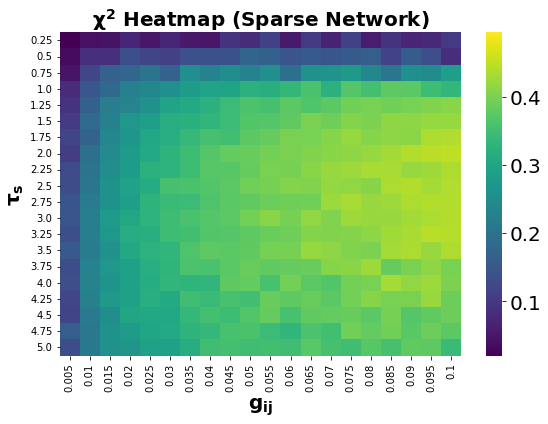

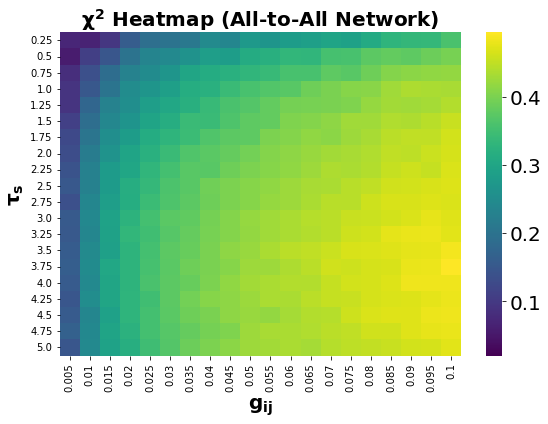

In [23]:
# Calculate common color scale bounds
combined_min = min(chi_sq_matrix.min(), chi_sq_matrix_A2A.min())
combined_max = max(chi_sq_matrix.max(), chi_sq_matrix_A2A.max())

plt.figure(figsize=(8, 6))
ax1 = sns.heatmap(
    chi_sq_matrix, 
    xticklabels=np.round(g_syn_values, 3), 
    yticklabels=np.round(tau_s_values, 2), 
    cmap='viridis',
    vmin=combined_min,      
    vmax=combined_max
)
# Increase colorbar tick size
cbar1 = ax1.collections[0].colorbar
cbar1.ax.tick_params(labelsize=20)  # set to whatever size you want

plt.xlabel(r'$\mathbf{g_{ij}}$', fontsize=20, fontweight='bold')
plt.ylabel(r'$\mathbf{\tau_s}$', fontsize=20, fontweight='bold')
plt.title(r'$\mathbf{\chi^2}$ Heatmap (Sparse Network)', fontsize=20, fontweight='bold')
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.tight_layout()
plt.savefig('Chi_Sparse.png')
plt.show()

plt.figure(figsize=(8, 6))
ax2 = sns.heatmap(
    chi_sq_matrix_A2A,
    xticklabels=np.round(g_syn_values, 3),
    yticklabels=np.round(tau_s_values, 2),
    cmap='viridis',
    vmin=combined_min,    
    vmax=combined_max
)
# Increase colorbar tick size
cbar2 = ax2.collections[0].colorbar
cbar2.ax.tick_params(labelsize=20)  # set to whatever size you want

plt.xlabel(r'$\mathbf{g_{ij}}$', fontsize=20, fontweight='bold')
plt.ylabel(r'$\mathbf{\tau_s}$', fontsize=20, fontweight='bold')
plt.title(r'$\mathbf{\chi^2}$ Heatmap (All-to-All Network)', fontsize=20, fontweight='bold')
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.tight_layout()
plt.savefig('Chi_A2A.png')
plt.show()


In [24]:
firing_rate_matrix = np.array([
    [20.88333333, 14.28333333, 12.76666667, 11.08333333, 10.41666667,  9.45      ,
     9.18333333,  8.66666667,  8.65      ,  8.28333333,  8.13333333,  7.95      ,
     7.73333333,  7.81666667,  7.71666667,  7.63333333,  7.51666667,  7.68333333,
     7.81666667,  7.63333333],
    [21.13333333, 14.85      , 12.68333333, 11.76666667, 11.06666667, 10.15      ,
     9.71666667,  9.2       ,  8.78333333,  8.61666667,  8.95      ,  8.41666667,
     8.21666667,  7.68333333,  7.71666667,  7.8       ,  7.98333333,  7.73333333,
     7.66666667,  7.6       ],
    [21.26666667, 17.75      , 13.81666667, 13.9       , 13.01666667, 11.78333333,
     11.53333333, 11.4       , 10.21666667, 10.36666667,  9.15      ,  9.45      ,
     8.71666667,  8.73333333,  8.68333333,  8.35      ,  8.25      ,  8.        ,
     7.73333333,  7.58333333],
    [24.18333333, 19.1       , 17.45      , 15.36666667, 12.85      , 13.56666667,
     13.25      , 12.13333333, 11.85      , 11.15      , 10.35      , 10.65      ,
     11.01666667, 10.45      , 10.26666667,  9.83333333,  9.58333333,  9.35      ,
      8.63333333,  8.46666667],
    [23.95      , 21.35      , 17.06666667, 17.28333333, 15.46666667, 14.66666667,
     13.95      , 13.05      , 11.88333333, 12.38333333, 12.56666667, 11.53333333,
     11.7       , 11.38333333, 10.93333333, 10.56666667, 10.38333333,  9.51666667,
      9.88333333,  9.46666667],
    [24.2       , 23.01666667, 19.95      , 17.43333333, 15.65      , 15.86666667,
     15.25      , 14.43333333, 13.85      , 12.7       , 12.85      , 11.28333333,
     11.33333333, 11.43333333, 10.76666667, 10.03333333, 10.23333333,  9.86666667,
      9.96666667,  9.2       ],
    [25.83333333, 21.78333333, 20.08333333, 20.13333333, 18.78333333, 16.36666667,
     16.86666667, 15.61666667, 14.23333333, 12.2       , 12.6       , 12.28333333,
     11.78333333, 11.56666667, 10.4       ,  9.95      , 10.26666667, 10.25      ,
      9.8       , 10.36666667],
    [25.6       , 23.43333333, 22.25      , 19.68333333, 18.73333333, 16.5       ,
     16.51666667, 16.13333333, 15.13333333, 14.73333333, 14.66666667, 14.66666667,
     12.86666667, 12.88333333, 12.41666667, 12.36666667, 11.53333333, 12.1       ,
     10.81666667, 11.23333333],
    [25.        , 23.3       , 22.06666667, 21.01666667, 18.98333333, 18.05      ,
     17.83333333, 15.51666667, 15.05      , 13.95      , 14.43333333, 13.85      ,
     12.38333333, 13.73333333, 12.06666667, 12.31666667, 11.66666667, 11.51666667,
     11.18333333, 10.75      ],
    [25.63333333, 23.2       , 21.46666667, 19.68333333, 19.41666667, 16.7       ,
     15.91666667, 15.31666667, 14.5       , 13.63333333, 14.11666667, 12.88333333,
     14.23333333, 11.76666667, 11.03333333, 11.38333333, 10.81666667, 10.55      ,
     10.05      , 11.06666667],
    [25.81666667, 23.36666667, 22.26666667, 20.13333333, 19.65      , 17.28333333,
     16.9       , 16.83333333, 13.43333333, 13.86666667, 13.46666667, 13.75      ,
     12.56666667, 12.71666667, 12.3       , 11.81666667, 11.78333333, 11.08333333,
     10.8       , 10.26666667],
    [26.11666667, 24.53333333, 22.63333333, 21.36666667, 19.06666667, 17.7       ,
     16.43333333, 15.88333333, 14.71666667, 13.48333333, 13.38333333, 12.23333333,
     12.16666667, 11.7       , 11.51666667, 10.75      , 10.31666667,  9.63333333,
     10.26666667,  9.2       ],
    [25.8       , 23.28333333, 21.98333333, 19.96666667, 18.48333333, 17.03333333,
     17.66666667, 14.33333333, 15.76666667, 13.5       , 13.68333333, 12.5       ,
     11.95      , 12.1       , 12.78333333, 11.3       , 10.55      , 11.06666667,
     10.53333333, 10.71666667],
    [25.        , 23.83333333, 23.81666667, 23.26666667, 21.2       , 19.83333333,
     19.73333333, 18.31666667, 16.63333333, 16.06666667, 14.63333333, 14.11666667,
     13.1       , 12.48333333, 13.35      , 12.15      , 12.26666667, 11.11666667,
     10.98333333, 10.68333333],
    [26.51666667, 25.58333333, 24.98333333, 22.33333333, 20.18333333, 18.58333333,
     16.86666667, 14.78333333, 15.3       , 14.45      , 14.46666667, 13.53333333,
     12.78333333, 12.98333333, 11.46666667, 11.36666667, 11.96666667, 11.2       ,
     10.31666667, 11.21666667],
    [27.76666667, 25.8       , 21.01666667, 21.38333333, 20.08333333, 17.81666667,
     18.01666667, 15.56666667, 16.01666667, 15.7       , 15.85      , 12.5       ,
     12.53333333, 13.15      , 12.01666667, 12.3       , 11.86666667, 11.91666667,
     11.73333333, 12.86666667],
    [27.06666667, 24.45      , 21.58333333, 20.26666667, 19.26666667, 18.06666667,
     17.71666667, 16.55      , 16.5       , 15.51666667, 14.25      , 13.45      ,
     12.91666667, 12.35      , 12.66666667, 12.2       , 10.53333333, 10.78333333,
      9.95      , 10.38333333],
    [26.71666667, 24.45      , 22.68333333, 19.35      , 20.05      , 17.43333333,
     15.63333333, 14.58333333, 14.03333333, 14.15      , 13.21666667, 12.01666667,
     12.01666667, 11.5       , 10.51666667, 10.45      , 10.78333333, 10.76666667,
      9.5       ,  9.85      ],
    [27.36666667, 24.4       , 22.66666667, 19.91666667, 16.66666667, 16.35      ,
     14.73333333, 15.46666667, 15.4       , 13.58333333, 12.6       , 12.23333333,
     12.43333333, 10.8       ,  9.38333333, 10.41666667,  9.75      ,  9.48333333,
      9.9       ,  9.68333333],
    [26.28333333, 24.53333333, 19.6       , 17.98333333, 17.13333333, 16.81666667,
     15.83333333, 15.71666667, 13.48333333, 13.03333333, 12.95      , 13.18333333,
     12.26666667, 11.5       , 11.16666667, 11.95      , 10.3       ,  9.55      ,
      9.56666667,  9.66666667]
])

In [25]:
firing_rate_matrix_A2A = np.array([
    [20.96666667, 12.75      ,  9.1       ,  9.9       ,  9.31666667,  8.15      ,
      7.6       ,  6.86666667,  6.48333333,  6.13333333,  6.26666667,  5.78333333,
      4.83333333,  4.48333333,  4.25      ,  4.65      ,  4.08333333,  3.96666667,
      3.9       ,  3.68333333],
    [21.21666667, 13.88333333, 13.2       , 11.03333333, 10.66666667,  9.15      ,
      8.7       ,  8.2       ,  7.6       ,  7.68333333,  7.11666667,  6.31666667,
      6.43333333,  6.13333333,  6.01666667,  5.68333333,  5.33333333,  5.06666667,
      4.21666667,  5.1       ],
    [22.01666667, 17.51666667, 14.78333333, 12.48333333, 12.28333333, 11.35      ,
     10.48333333,  9.66666667,  9.08333333,  8.35      ,  7.83333333,  7.51666667,
      7.56666667,  7.55      ,  6.8       ,  5.83333333,  6.4       ,  6.63333333,
      5.7       ,  5.8       ],
    [23.01666667, 18.66666667, 15.85      , 14.03333333, 12.35      , 12.86666667,
     11.05      , 10.43333333,  9.63333333, 10.        ,  9.76666667,  8.95      ,
      8.5       ,  8.06666667,  7.63333333,  7.41666667,  7.03333333,  7.11666667,
      6.36666667,  6.15      ],
    [23.38333333, 20.91666667, 17.3       , 15.78333333, 14.3       , 13.16666667,
     12.23333333, 11.56666667, 11.18333333, 10.13333333,  9.95      ,  9.06666667,
      9.15      ,  8.85      ,  9.01666667,  7.81666667,  8.13333333,  8.16666667,
      7.71666667,  7.5       ],
    [24.23333333, 22.33333333, 20.55      , 17.38333333, 15.98333333, 14.26666667,
     14.23333333, 12.8       , 12.48333333, 11.1       , 10.66666667, 10.25      ,
     10.53333333,  9.25      ,  9.43333333,  8.56666667,  8.86666667,  8.58333333,
      7.35      ,  7.51666667],
    [25.05      , 22.03333333, 21.9       , 19.13333333, 17.85      , 16.35      ,
     15.35      , 13.58333333, 13.58333333, 12.45      , 12.18333333, 10.88333333,
     11.11666667, 10.03333333,  9.75      ,  9.46666667,  9.35      ,  8.48333333,
      8.8       ,  8.58333333],
    [25.7       , 23.75      , 21.1       , 19.75      , 18.13333333, 16.86666667,
     15.28333333, 14.93333333, 14.16666667, 13.11666667, 12.7       , 12.21666667,
     11.5       , 10.4       , 11.16666667, 10.51666667, 10.06666667,  9.93333333,
      9.26666667,  9.25      ],
    [26.35      , 24.85      , 22.05      , 21.        , 18.26666667, 17.86666667,
     16.66666667, 15.48333333, 14.65      , 14.26666667, 13.53333333, 12.61666667,
     12.18333333, 11.93333333, 10.86666667, 10.7       ,  9.96666667,  9.56666667,
      9.5       ,  9.        ],
    [25.21666667, 23.43333333, 21.45      , 20.28333333, 18.85      , 18.3       ,
     16.5       , 15.66666667, 14.26666667, 13.98333333, 13.68333333, 12.68333333,
     12.11666667, 11.6       , 11.23333333, 10.2       , 10.3       ,  9.6       ,
      9.1       ,  8.63333333],
    [26.        , 23.86666667, 21.91666667, 20.61666667, 19.53333333, 18.43333333,
     17.21666667, 16.66666667, 15.75      , 14.71666667, 14.38333333, 14.63333333,
     13.63333333, 13.35      , 12.06666667, 11.66666667, 11.36666667, 10.86666667,
     10.45      , 10.41666667],
    [26.58333333, 24.75      , 23.6       , 21.65      , 20.11666667, 17.33333333,
     17.25      , 16.03333333, 14.8       , 14.25      , 14.06666667, 12.98333333,
     12.51666667, 14.06666667, 13.6       , 10.83333333, 11.        , 10.8       ,
     11.51666667, 11.95      ],
    [26.33333333, 23.71666667, 21.51666667, 20.48333333, 19.6       , 18.38333333,
     17.5       , 16.93333333, 16.5       , 17.18333333, 15.8       , 15.58333333,
     14.86666667, 15.        , 14.45      , 11.9       , 13.31666667, 11.38333333,
     12.4       , 12.35      ],
    [26.45      , 24.9       , 24.23333333, 23.31666667, 22.26666667, 21.13333333,
     20.16666667, 19.11666667, 18.38333333, 16.01666667, 16.43333333, 16.31666667,
     14.18333333, 13.8       , 13.16666667, 12.98333333, 12.48333333, 12.7       ,
     12.41666667, 11.75      ],
    [25.68333333, 26.7       , 25.53333333, 23.75      , 20.65      , 19.66666667,
     18.8       , 17.95      , 16.8       , 16.18333333, 15.9       , 15.4       ,
     14.55      , 14.15      , 14.06666667, 13.8       , 13.28333333, 12.86666667,
     12.86666667, 12.35      ],
    [27.51666667, 27.55      , 22.86666667, 22.28333333, 21.        , 20.11666667,
     19.21666667, 18.1       , 17.5       , 17.01666667, 16.55      , 15.91666667,
     15.16666667, 15.11666667, 14.        , 14.11666667, 13.53333333, 12.26666667,
     11.28333333, 11.05      ],
    [27.66666667, 24.65      , 23.13333333, 22.26666667, 21.13333333, 20.31666667,
     19.83333333, 18.48333333, 17.95      , 15.35      , 14.55      , 14.46666667,
     13.5       , 13.15      , 12.36666667, 12.41666667, 12.13333333, 11.85      ,
     11.46666667, 11.23333333],
    [28.2       , 24.8       , 23.8       , 22.66666667, 21.1       , 18.        ,
     17.1       , 16.81666667, 16.25      , 15.76666667, 15.3       , 14.8       ,
     14.01666667, 13.83333333, 13.23333333, 12.76666667, 12.51666667, 12.21666667,
     11.65      , 11.63333333],
    [28.23333333, 25.73333333, 24.13333333, 19.65      , 18.91666667, 17.95      ,
     17.33333333, 17.03333333, 16.38333333, 16.18333333, 15.5       , 15.11666667,
     14.8       , 14.13333333, 13.85      , 13.18333333, 12.51666667, 12.5       ,
     11.61666667, 10.15      ],
    [26.03333333, 25.18333333, 20.96666667, 20.05      , 19.05      , 18.36666667,
     17.35      , 17.21666667, 16.88333333, 16.31666667, 14.61666667, 14.65      ,
     12.85      , 12.21666667, 11.86666667, 11.4       , 11.16666667, 10.88333333,
     10.6       , 10.08333333]
])


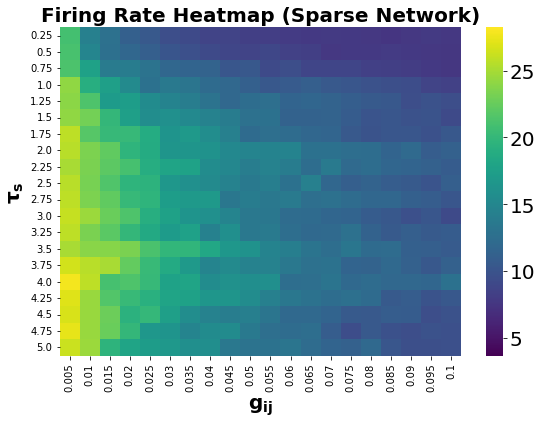

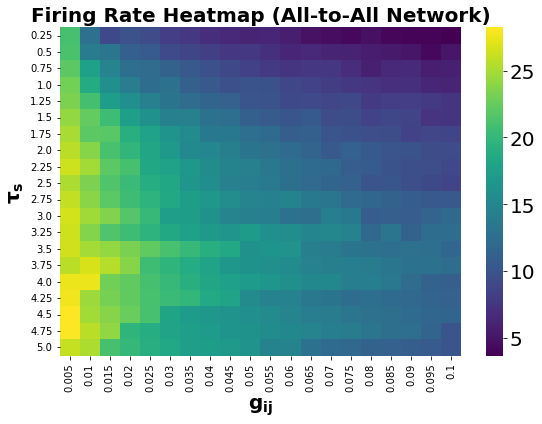

In [26]:
# Calculate common color scale bounds
combined_min = min(firing_rate_matrix.min(), firing_rate_matrix_A2A.min())
combined_max = max(firing_rate_matrix.max(), firing_rate_matrix_A2A.max())

plt.figure(figsize=(8, 6))
ax1 = sns.heatmap(
    firing_rate_matrix, 
    xticklabels=np.round(g_syn_values, 3), 
    yticklabels=np.round(tau_s_values, 2), 
    cmap='viridis',
    vmin=combined_min,      
    vmax=combined_max
)
# Increase colorbar tick size
cbar1 = ax1.collections[0].colorbar
cbar1.ax.tick_params(labelsize=20)  # set to whatever size you want

plt.xlabel(r'$\mathbf{g_{ij}}$', fontsize=20, fontweight='bold')
plt.ylabel(r'$\mathbf{\tau_s}$', fontsize=20, fontweight='bold')
plt.title('Firing Rate Heatmap (Sparse Network)', fontsize=20, fontweight='bold')
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.tight_layout()
plt.savefig('FiringRate_Sparse.png')
plt.show()

plt.figure(figsize=(8, 6))
ax2 = sns.heatmap(
    firing_rate_matrix_A2A,
    xticklabels=np.round(g_syn_values, 3),
    yticklabels=np.round(tau_s_values, 2),
    cmap='viridis',
    vmin=combined_min,    
    vmax=combined_max
)
# Increase colorbar tick size
cbar2 = ax2.collections[0].colorbar
cbar2.ax.tick_params(labelsize=20)  # set to whatever size you want

plt.xlabel(r'$\mathbf{g_{ij}}$', fontsize=20, fontweight='bold')
plt.ylabel(r'$\mathbf{\tau_s}$', fontsize=20, fontweight='bold')
plt.title('Firing Rate Heatmap (All-to-All Network)', fontsize=20, fontweight='bold')
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.tight_layout()
plt.savefig('FiringRate_A2A.png')
plt.show()


In [31]:
isi_freq_matrix_A2A = np.load("results/isi_freq_matrix_A2A.npy")

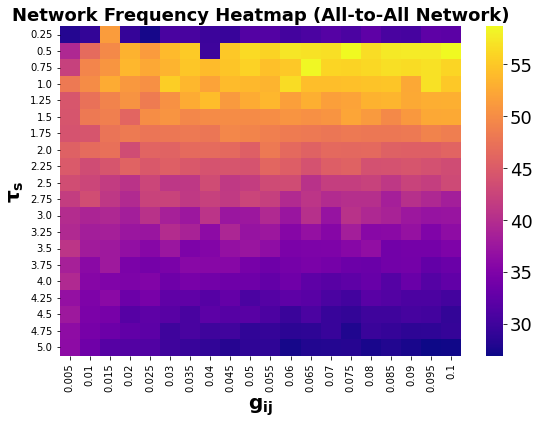

In [32]:
plt.figure(figsize=(8, 6))
ax = sns.heatmap(  # Assign the plot to 'ax'
    isi_freq_matrix_A2A,
    xticklabels=np.round(g_syn_values, 3),
    yticklabels=np.round(tau_s_values, 2),
    cmap='plasma'
)

# Access and modify the colorbar
colorbar = ax.collections[0].colorbar
colorbar.ax.tick_params(labelsize=18)  # Change labelsize to your preference

plt.xlabel(r'$\mathbf{g_{ij}}$', fontsize=20, fontweight='bold')
plt.ylabel(r'$\mathbf{\tau_s}$', fontsize=20, fontweight='bold')
plt.title("Network Frequency Heatmap (All-to-All Network)", fontsize=18, fontweight='bold')
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.tight_layout()
plt.savefig('Network_Frequency_A2A.png')
plt.show()

Average number of connections per neuron: 39.596666666666664
Connectivity Matrix g [[0.   0.03 0.   ... 0.   0.   0.  ]
 [0.   0.   0.   ... 0.   0.03 0.  ]
 [0.   0.   0.   ... 0.   0.   0.  ]
 ...
 [0.   0.03 0.   ... 0.   0.   0.03]
 [0.   0.   0.   ... 0.   0.   0.  ]
 [0.   0.   0.   ... 0.   0.03 0.  ]]
Average value of matrix g= 0.003959666666666666
Chi measure (synchrony): 0.3376599271913788
Average firing rate 16.766666666666666


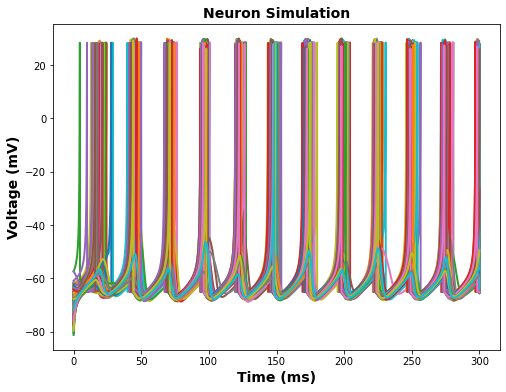

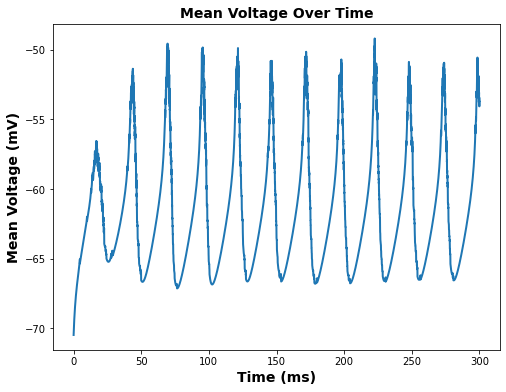

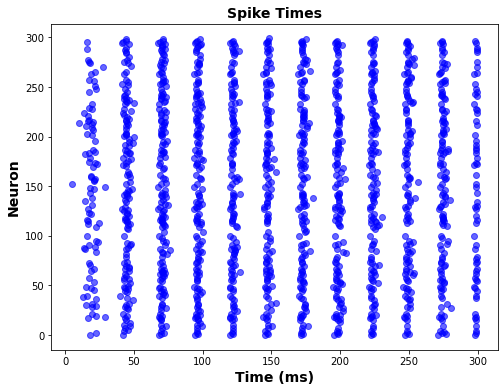

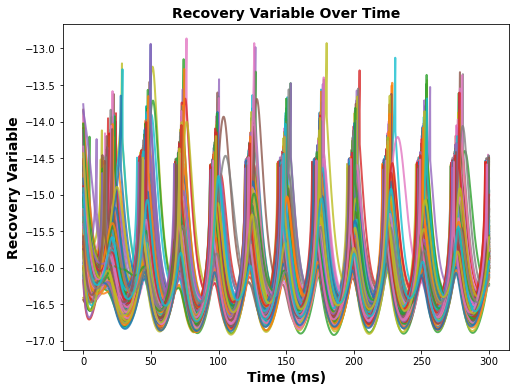

In [37]:
np.random.seed(101)

N = 300
T = 300
M = 50000
dt = 0.005
t0 = 0

k = 1
a = 0.1
b = 0.26
c = -65
d = -1
v_reset = c
v_thresh = 30

Esyn = -70
tauS = 3.043043043043043 # Obtained from having peaks of coupling in paper and in ours aligned

J = np.random.normal(0, 0.1, size=(N))


I = 0.6

# Define desired average number of connections
Avg_Connections = 40
connection_probability = Avg_Connections / N

# Initialize the synaptic coupling matrix
g = np.zeros((N, N))

# # Sparsely connected networks with probabilistic connections
for j in range(N):
    for i in range(N):
        if i != j:  # Avoid self-connections
            if np.random.rand() < connection_probability:
                g[j, i] = 0.03  # Set connection strength 



# Set the diagonal elements to zero
np.fill_diagonal(g, 0)

v_init = np.random.normal(-70, 5, size=(N))
u_init = np.random.normal(-15, 0.5, size = (N)) # Ask any reason why these were chosen and not ones in page 3 paper
s_init = np.zeros(N)
p_init = np.zeros(N)

t_all = np.array([t0])
y_0 = np.concatenate([v_init, u_init, s_init, p_init])
y_all = np.reshape(y_0, (y_0.shape[0], 1))

spike_times = np.zeros((M, 2))
spikeCounter = 0
i = 0

def dxdt(t, x, k, a, b, I, Esyn, J, tauS):
    v = x[:N]
    u = x[N:2*N]
    s = x[2*N:3*N]
    p = x[3*N:4*N]
    
    dvdt = k * (0.04 * v**2 + 5 * v + 140 - u + I) + J - (v - Esyn) * np.dot(g,s)
    dudt = k * a * (b * v - u)
    dsdt = -s / tauS + p / tauS
    dpdt = -p / tauS
    
    return np.concatenate([dvdt, dudt, dsdt, dpdt])

# Spike event
def v_spike(t, x, k, a, b, I, Esyn, J, tauS):
    return x[:N].max() - v_thresh
v_spike.terminal = True
v_spike.direction = 1

# Set up spike time vector
spike_times = np.zeros((M, 2))
spikeCounter = 0    
i = 0

# Simulation loop
while i < M and t0 < T:
    y0 = np.concatenate([v_init, u_init, s_init, p_init])  
   
    sol_v = solve_ivp(dxdt, [t0, T], y0, args=(k, a, b, I, Esyn, J, tauS), dense_output=True, 
                      events=v_spike, rtol=1e-8)
    
    t_end = sol_v.t[-1]
    steps = max([2, int((t_end - t0) / dt)])
    t = np.linspace(t0, t_end, steps)
    y = sol_v.sol(t)
    
    t_all = np.concatenate([t_all, t[:-1]], axis=0)
    y_all = np.concatenate([y_all, y[:, :-1]], axis=1)
    
    t0 = t_end
    v_init = y[:N, -1]
    u_init = y[N:2*N, -1]
    s_init = y[2*N:3*N, -1]
    p_init = y[3*N:4*N, -1]
    
    if len(sol_v.t_events[0]) > 0:
        spike = v_init.argmax()
        v_init[spike] = v_reset
        u_init[spike] += d
        p_init[spike] += (2.7185823035951033)/(tauS/3.043043043043043) #x0 
        
        
        spike_times[spikeCounter, :] = [t0, spike]
        spikeCounter = spikeCounter + 1
        i += 1

colours = sns.color_palette('deep')
font = {'family': 'Times', 'weight': 'normal', 'size': 18}
plt.rc('font', **font)

# Plot 1: Neuron Simulation
plt.figure(figsize=(8, 6))
plt.plot(t_all, y_all[:N, :].T, linewidth=2)
plt.xlabel('Time (ms)', fontsize=14, fontweight='bold')
plt.ylabel('Voltage (mV)', fontsize=14, fontweight='bold')
plt.title('Neuron Simulation', fontsize=14, fontweight='bold')
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.savefig('NeuronModel_A2A.png')

# Plot 2: Mean Voltage Over Time
plt.figure(figsize=(8, 6))
plt.plot(t_all, y_all[:N, :].mean(axis=0), linewidth=2)
plt.xlabel('Time (ms)', fontsize=14, fontweight='bold')
plt.ylabel('Mean Voltage (mV)', fontsize=14, fontweight='bold')
plt.title('Mean Voltage Over Time', fontsize=14, fontweight='bold')
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
#plt.savefig('MeanVoltage_A2A.png')

# Plot 3: Spike Times Scatter Plot
spike_times = spike_times[:spikeCounter, :]
plt.figure(figsize=(8, 6))
plt.scatter(spike_times[:, 0], spike_times[:, 1], color='blue', alpha=0.6)
plt.xlabel('Time (ms)', fontsize=14, fontweight='bold')
plt.ylabel('Neuron', fontsize=14, fontweight='bold')
plt.title('Spike Times', fontsize=14, fontweight='bold')
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
#plt.savefig('SpikeTimes_A2A.png')

# Plot 4: Recovery Variable
plt.figure(figsize=(8, 6))
plt.plot(t_all, y_all[N:2*N, :].T, linewidth=2, alpha=0.8)
plt.xlabel('Time (ms)', fontsize=14, fontweight='bold')
plt.ylabel('Recovery Variable', fontsize=14, fontweight='bold')
plt.title('Recovery Variable Over Time', fontsize=14, fontweight='bold')
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
#plt.savefig('RecoveryVariable_A2A.png')




# Count the number of non-zero entries in each row
connections_per_neuron = np.count_nonzero(g, axis=1)

# Calculate the average number of connections per neuron
average_connections = np.mean(connections_per_neuron)

print(f"Average number of connections per neuron: {average_connections}")
print("Connectivity Matrix g", g)
print("Average value of matrix g=", np.mean(g))
# Extract the voltage traces (first N rows of y_all)
voltage_data = y_all[:N, :]  # Shape: (N, time_steps)

# Compute the Chi measure
chi_value = compute_chi(voltage_data)

# Print the Chi measure
print(f"Chi measure (synchrony): {chi_value}")


average_firing_rate = len(spike_times[spike_times[:, 0] > 100]) / (N * (T - 100))*1000
print("Average firing rate", average_firing_rate)

findfont: Font family ['Times'] not found. Falling back to DejaVu Sans.
findfont: Font family ['Times'] not found. Falling back to DejaVu Sans.


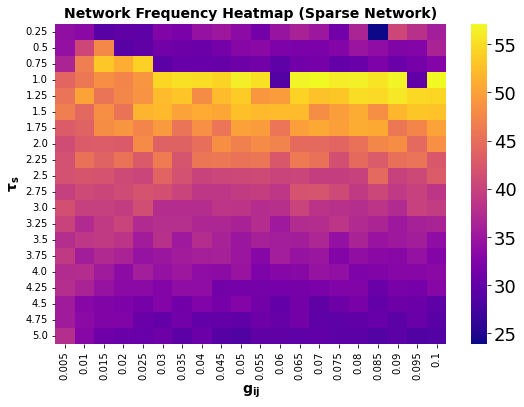

In [39]:
# Create results directory
os.makedirs("results", exist_ok=True)

# Parameter grid
tau_s_values = np.linspace(0.25, 5, 20)
g_syn_values = np.linspace(0.005, 0.1, 20)
isi_freq_matrix = np.zeros((len(tau_s_values), len(g_syn_values)))

# File paths
progress_path = "results/isi_freq_progress.json"
matrix_path = "results/isi_freq_matrix.npy"

# Load progress if it exists
completed = []
if os.path.exists(progress_path):
    with open(progress_path, "r") as f:
        completed = json.load(f)

if os.path.exists(matrix_path):
    isi_freq_matrix = np.load(matrix_path)

# --- Begin parameter sweep ---
for i, tau_s in enumerate(tau_s_values):
    for j, g_syn in enumerate(g_syn_values):
        if [i, j] in completed:
            continue

        # Generate connectivity
        g = np.zeros((N, N))
        for row in range(N):
            for col in range(N):
                if row != col and np.random.rand() < connection_probability:
                    g[row, col] = g_syn

        # Initialize neuron states
        v_init = np.random.normal(-70, 15, size=N)
        u_init = np.random.normal(-15, 0.5, size=N)
        s_init = np.zeros(N)
        p_init = np.zeros(N)

        t0 = 0
        i_step = 0
        spikeCounter = 0
        spike_times = np.zeros((M, 2))

        # Simulate network
        while i_step < M and t0 < T:
            y0 = np.concatenate([v_init, u_init, s_init, p_init])
            sol_v = solve_ivp(
                dxdt, [t0, T], y0,
                args=(k, a, b, I, Esyn, J, tau_s),
                dense_output=True,
                events=v_spike,
                rtol=1e-8
            )

            t_end = sol_v.t[-1]
            steps = max([2, int((t_end - t0) / dt)])
            t_eval = np.linspace(t0, t_end, steps)
            y = sol_v.sol(t_eval)

            t0 = t_end
            v_init = y[:N, -1]
            u_init = y[N:2 * N, -1]
            s_init = y[2 * N:3 * N, -1]
            p_init = y[3 * N:4 * N, -1]

            if len(sol_v.t_events[0]) > 0:
                spike = v_init.argmax()
                v_init[spike] = v_reset
                u_init[spike] += d
                p_init[spike] += (2.7185823035951033)/(tau_s / 3.043043043043043)
                spike_times[spikeCounter, :] = [t0, spike]
                spikeCounter += 1
                i_step += 1

        # --- Process ISIs ---
        neuron_spike_times = {n: [] for n in range(N)}
        for idx in range(spikeCounter):
            time, neuron = spike_times[idx]
            neuron_spike_times[int(neuron)].append(time)

        interspike_intervals = []
        for times in neuron_spike_times.values():
            times = sorted(times)
            if len(times) > 1:
                isis = np.diff(times)
                interspike_intervals.extend(isis)

        interspike_intervals = [isi for isi in interspike_intervals if isi > 0]

        if interspike_intervals:
            frequencies, bin_edges = np.histogram(interspike_intervals, bins=100)
            max_freq_idx = np.argmax(frequencies)
            most_common_isi = 0.5 * (bin_edges[max_freq_idx] + bin_edges[max_freq_idx + 1])
            firing_rate_hz = 1000.0 / most_common_isi
        else:
            firing_rate_hz = 0.0

        isi_freq_matrix[i, j] = firing_rate_hz

        # Save progress
        np.save(matrix_path, isi_freq_matrix)
        np.savez(f"results/isi_sim_{i}_{j}.npz", spike_times=spike_times, tau_s=tau_s, g_syn=g_syn)
        completed.append([i, j])
        with open(progress_path, "w") as f:
            json.dump(completed, f)

# --- Plot the heatmap ---
plt.figure(figsize=(8, 6))
sns.heatmap(
    isi_freq_matrix,
    xticklabels=np.round(g_syn_values, 3),
    yticklabels=np.round(tau_s_values, 2),
    cmap='plasma'
)
plt.xlabel(r'$\mathbf{g_{ij}}$', fontsize=14, fontweight='bold')
plt.ylabel(r'$\mathbf{\tau_s}$', fontsize=14, fontweight='bold')
plt.title("Network Frequency Heatmap (Sparse Network)", fontsize=14, fontweight='bold')
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.tight_layout()
plt.savefig('Network_Frequency_Sparse.png')
plt.show()

In [ ]:
print(isi_freq_matrix)

In [ ]:
num_neurons = 300
# Create results directory
os.makedirs("results", exist_ok=True)

# Define grid
tau_s_values = np.linspace(0.25, 5, 20)
g_syn_values = np.linspace(0.005, 0.1, 20)
reliability_matrix = np.zeros((len(tau_s_values), len(g_syn_values)))

# File paths
progress_path = "results/reliability_progress.json"
matrix_path = "results/reliability_matrix.npy"

# Load progress if available
completed = []
if os.path.exists(progress_path):
    with open(progress_path, "r") as f:
        completed = json.load(f)

if os.path.exists(matrix_path):
    reliability_matrix = np.load(matrix_path)

# Main loop
for i, tau_s in enumerate(tau_s_values):
    for j, g_syn in enumerate(g_syn_values):
        if [i, j] in completed:
            continue

        # Synaptic coupling matrix
        g = np.zeros((N, N))
        for row in range(N):
            for col in range(N):
                if row != col and np.random.rand() < connection_probability:
                    g[row, col] = g_syn

        # Initial conditions
        v_init = np.random.normal(-70, 5, size=(N))
        u_init = np.random.normal(-15, 0.5, size=(N))
        s_init = np.zeros(N)
        p_init = np.zeros(N)

        t0 = 0
        t_all = np.array([t0])
        y_0 = np.concatenate([v_init, u_init, s_init, p_init])
        y_all = np.reshape(y_0, (y_0.shape[0], 1))

        spike_matrix = np.zeros((N, int(T / dt)))
        spikeCounter = 0
        i_step = 0

        while i_step < M and t0 < T:
            y0 = np.concatenate([v_init, u_init, s_init, p_init])
            sol_v = solve_ivp(
                dxdt,
                [t0, T],
                y0,
                args=(k, a, b, I, Esyn, J, tau_s),
                dense_output=True,
                events=v_spike,
                rtol=1e-8
            )

            t_end = sol_v.t[-1]
            steps = max([2, int((t_end - t0) / dt)])
            t = np.linspace(t0, t_end, steps)
            y = sol_v.sol(t)

            t_all = np.concatenate([t_all, t[:-1]], axis=0)
            y_all = np.concatenate([y_all, y[:, :-1]], axis=1)

            t0 = t_end
            v_init = y[:N, -1]
            u_init = y[N:2*N, -1]
            s_init = y[2*N:3*N, -1]
            p_init = y[3*N:4*N, -1]

            if len(sol_v.t_events[0]) > 0:
                spike = v_init.argmax()
                v_init[spike] = v_reset
                u_init[spike] += d
                p_init[spike] += (2.7185823035951033)/(tau_s / 3.043043043043043)
                spike_col = int(t0 / dt)
                if spike_col < spike_matrix.shape[1]:
                    spike_matrix[spike, spike_col] = 1
                spikeCounter += 1
                i_step += 1

        # ----------------------------------------------------
        # Instead of computing t_R from ISIs, just set t_R=10:
        # ----------------------------------------------------
        t_R = 10.0

        # Reliability calculation
        t_axis = np.linspace(0, T, spike_matrix.shape[1])
        reliability, _ = compute_Reliability(spike_matrix, t_axis, t_R)
        reliability_matrix[i, j] = reliability

        # Save matrix
        np.save(matrix_path, reliability_matrix)

        # Save raw data
        np.savez(f"results/reliability_sim_{i}_{j}.npz",
                 spike_matrix=spike_matrix, tau_s=tau_s, g_syn=g_syn)

        # Save progress
        completed.append([i, j])
        with open(progress_path, "w") as f:
            json.dump(completed, f)

# === Final plot ===
plt.figure(figsize=(8, 6))
sns.heatmap(
    reliability_matrix,
    xticklabels=np.round(g_syn_values, 3),
    yticklabels=np.round(tau_s_values, 2),
    cmap='viridis'
)
plt.xlabel(r'$\mathbf{g_{ij}}$', fontsize=20, fontweight='bold')
plt.ylabel(r'$\mathbf{\tau_s}$', fontsize=20, fontweight='bold')
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.title('Reliability Heatmap (Sparse Network)', fontsize=14, fontweight='bold')
plt.tight_layout()
plt.savefig('Reliability_Sparse.png')
plt.show()


In [ ]:
print(reliability_matrix)